In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
smote = SMOTE()
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [2]:
#!pip install graphviz
#conda install -c conda-forge python-graphviz

In [3]:
#conda install -c conda-forge python-graphviz

In [4]:
churnData = pd.read_csv(r"C:\Users\User\Downloads\DATA_Customer-Churn.csv")
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [5]:
churnData['TotalCharges']=pd.to_numeric(churnData['TotalCharges'],errors='coerce')

In [6]:
churnData['TotalCharges'].fillna(0, inplace = True)


In [7]:
churnData_cat= churnData.select_dtypes(include=['object'])
churnData_numerical = churnData.select_dtypes(include=['int64','float64'])


In [8]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()


for columns in churnData_cat:
    churnData_cat[columns]=label_encoder.fit_transform(churnData_cat[columns])

df=pd.concat([churnData_cat,churnData_numerical],axis=1) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   Partner           7043 non-null   int32  
 2   Dependents        7043 non-null   int32  
 3   PhoneService      7043 non-null   int32  
 4   OnlineSecurity    7043 non-null   int32  
 5   OnlineBackup      7043 non-null   int32  
 6   DeviceProtection  7043 non-null   int32  
 7   TechSupport       7043 non-null   int32  
 8   StreamingTV       7043 non-null   int32  
 9   StreamingMovies   7043 non-null   int32  
 10  Contract          7043 non-null   int32  
 11  Churn             7043 non-null   int32  
 12  SeniorCitizen     7043 non-null   int64  
 13  tenure            7043 non-null   int64  
 14  MonthlyCharges    7043 non-null   float64
 15  TotalCharges      7043 non-null   float64
dtypes: float64(2), int32(12), int64(2)
memory 

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()


churnData['Churn']=label_encoder.fit_transform(churnData['Churn'])
churnData

churnData_1=churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges','TotalCharges']]


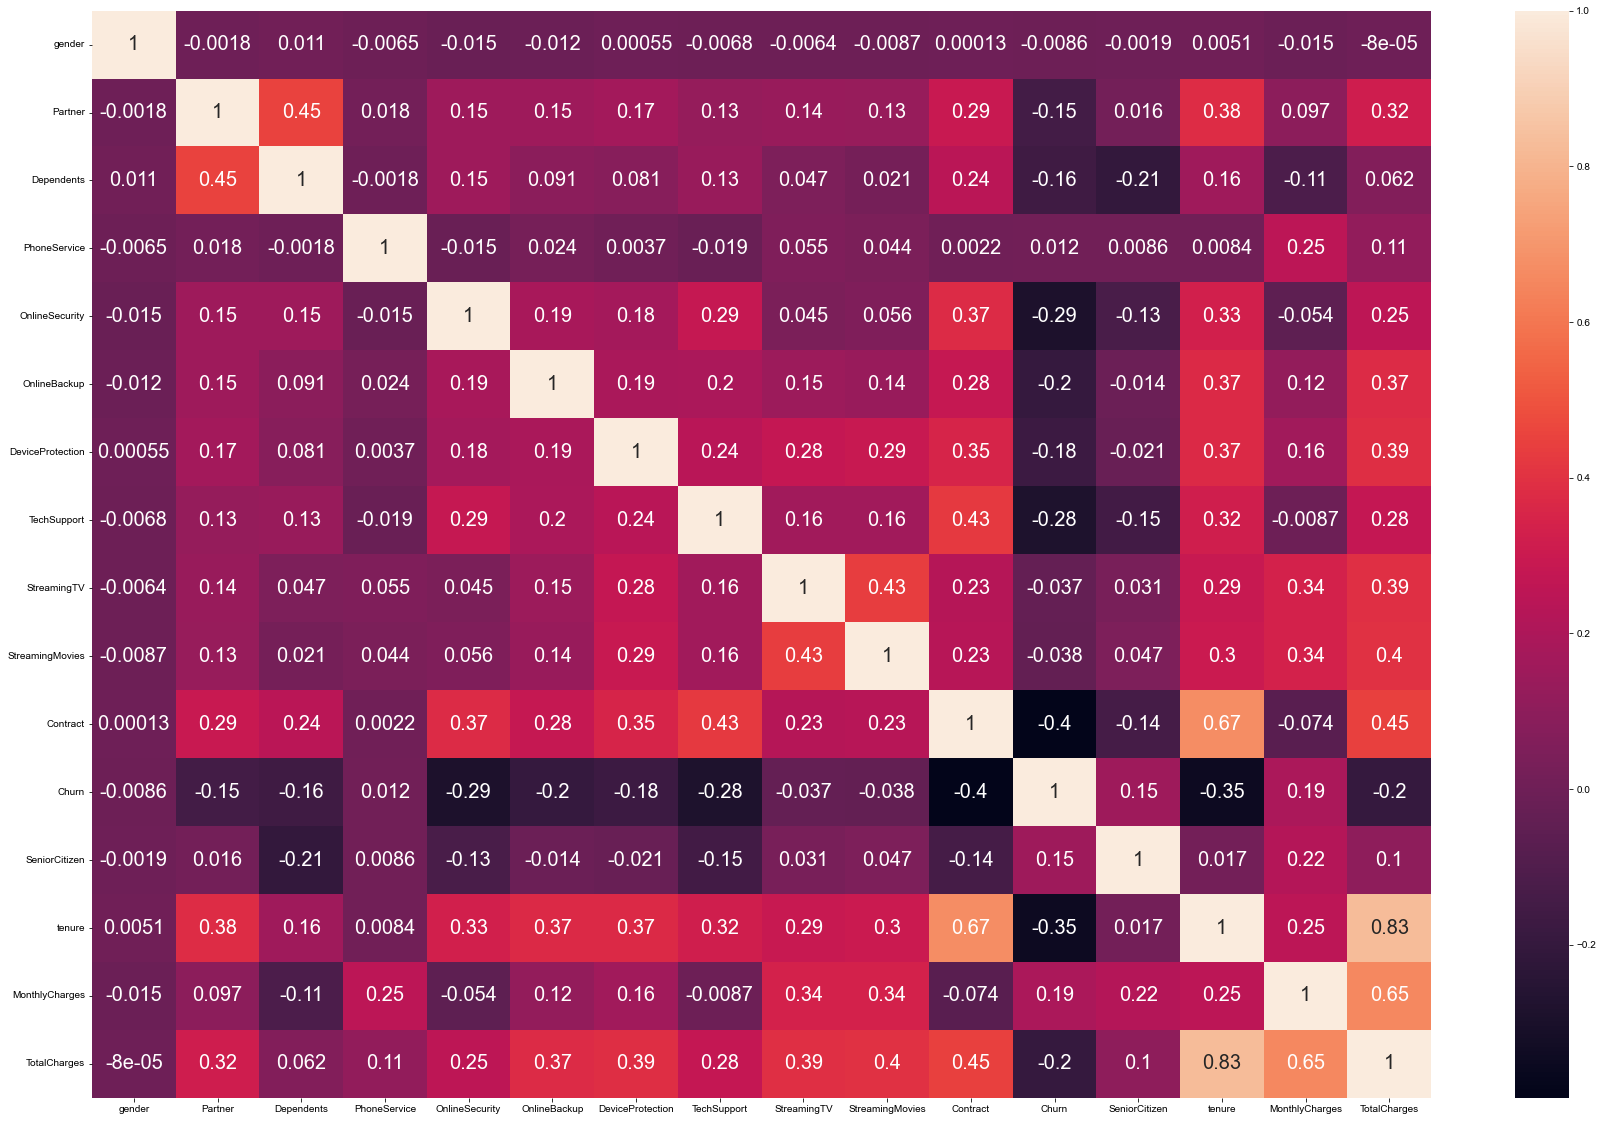

In [9]:
import seaborn as sns
fig1=plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot_kws={"size":20},annot=True)
sns.set(font_scale=5)


In [10]:
X=df.drop(columns=['Churn'],axis = 1)
y=df.Churn



,Error_metric,Train,Test
0,Accuracy,0.812744,0.801278
1,Precision,0.693950,0.668966
2,Recall,0.523139,0.513228


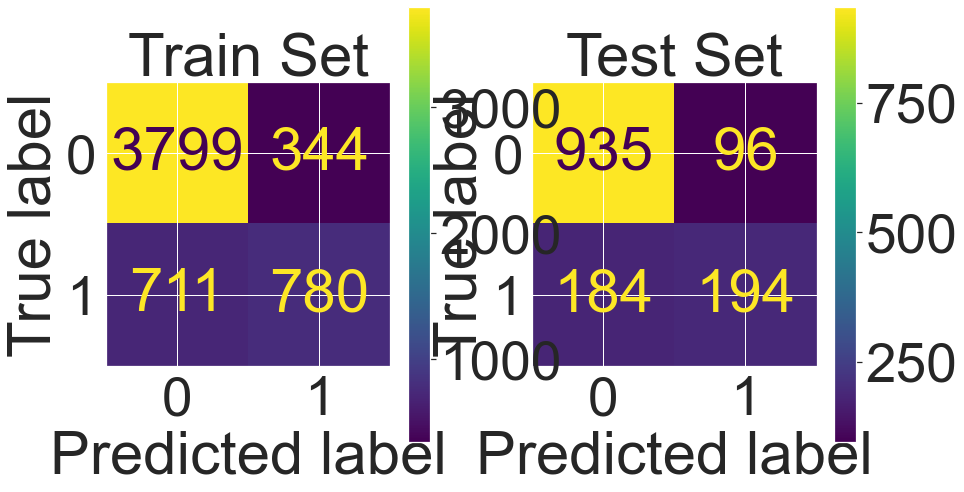

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)
smote = SMOTE()

X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

model = DecisionTreeClassifier(max_depth=6)

model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")


plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [12]:
y_train_sm.value_counts()

0    4143
1    4143
Name: Churn, dtype: int64

# Features Importances


<BarContainer object of 15 artists>

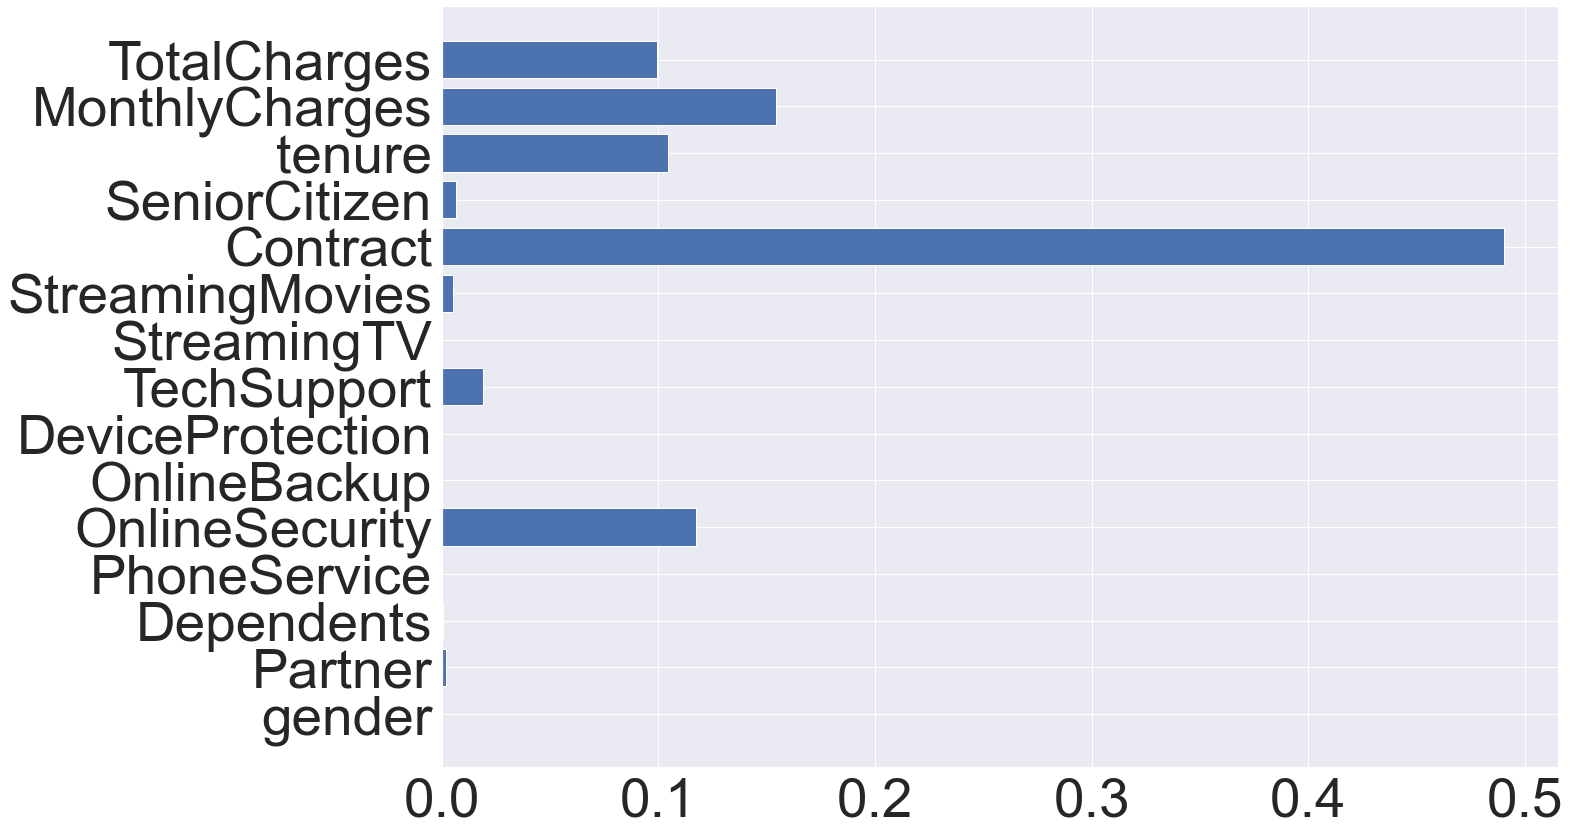

In [13]:
plt.figure(figsize=(20,14))
plt.barh(X.columns,model.feature_importances_)

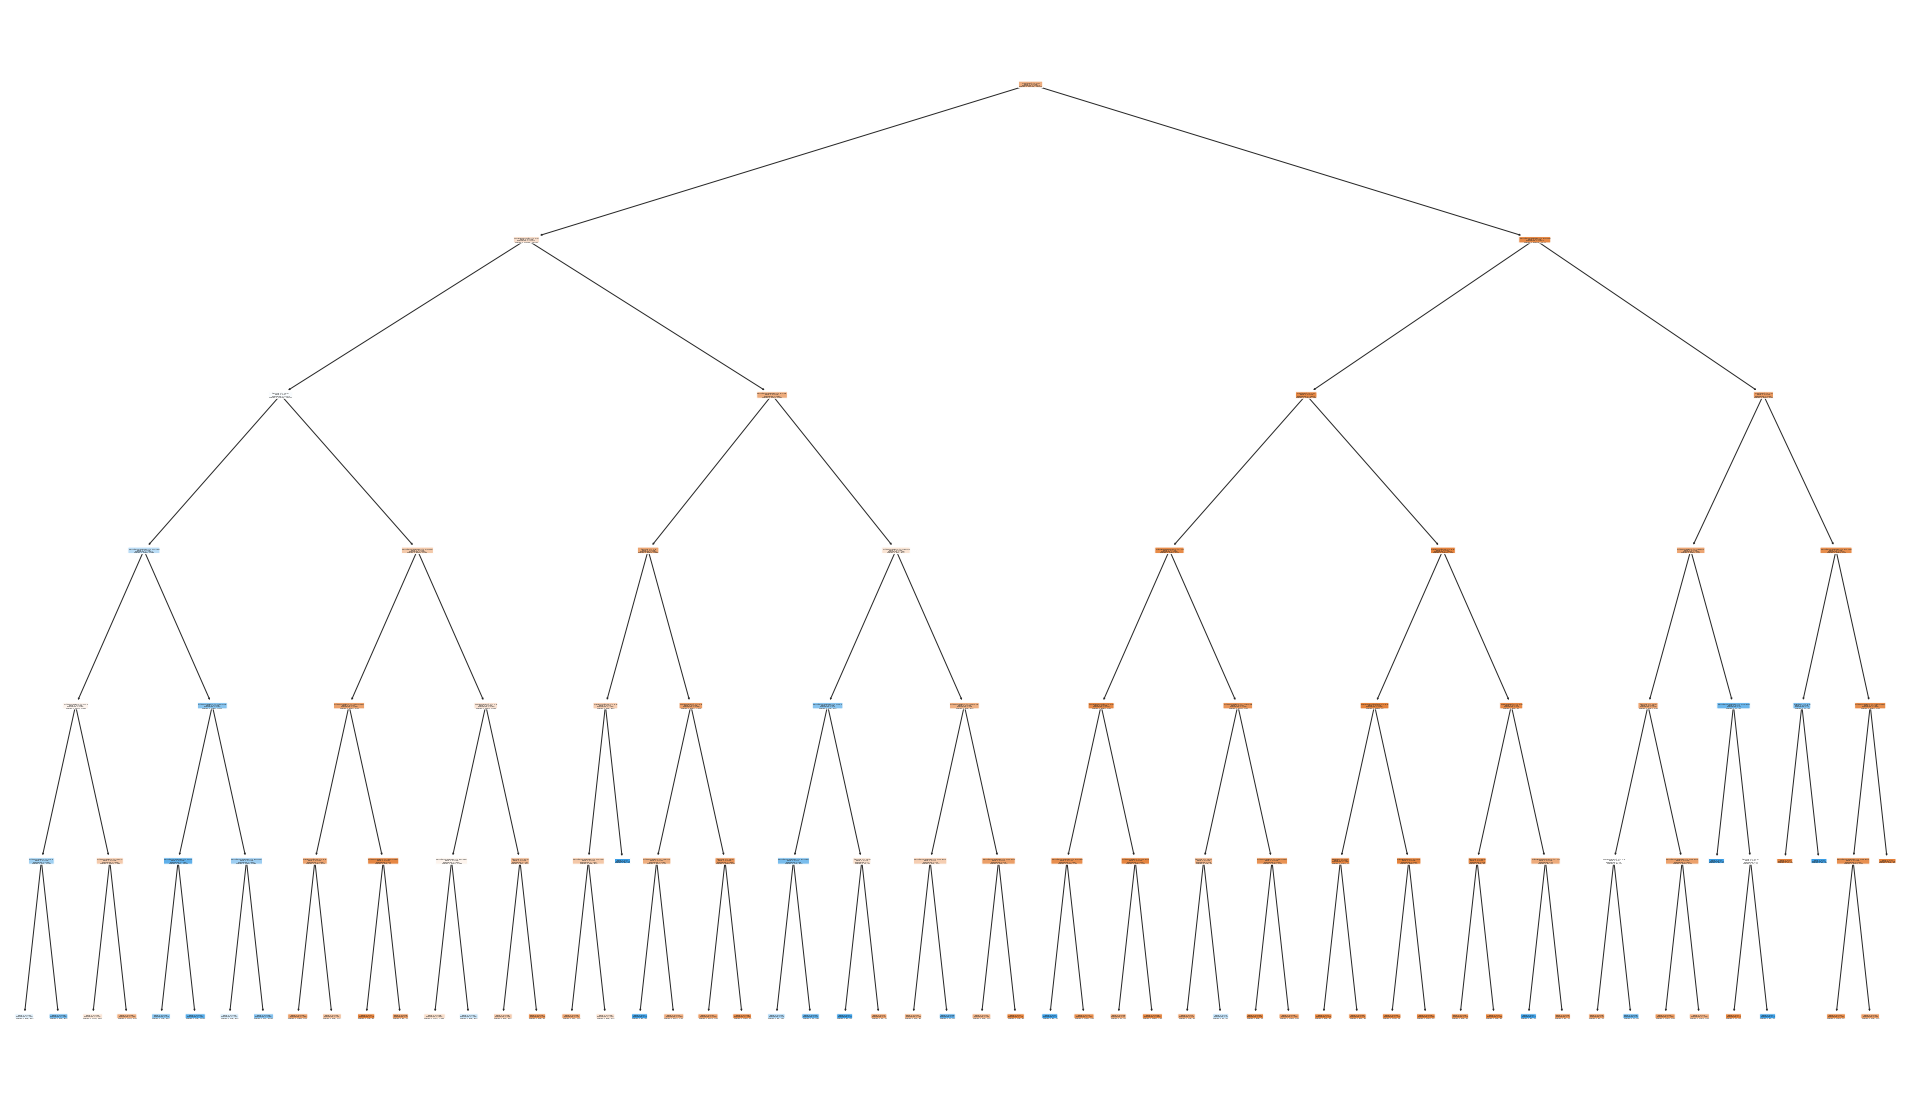

In [14]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(model,filled = True, rounded=True,feature_names=X.columns)
plt.show() 

# CROSS VALIDATION

In [15]:
scores=cross_val_score(model, X_train, y_train, cv=5)
scores

array([0.76929902, 0.78615794, 0.79503106, 0.78172138, 0.78241563])

In [16]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.78 accuracy with a standard deviation of 0.01


In [17]:
display(performance_df)


,Error_metric,Train,Test
0,Accuracy,0.812744,0.801278
1,Precision,0.693950,0.668966
2,Recall,0.523139,0.513228
